In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
writers = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/Writers%20data.csv?token=GHSAT0AAAAAAB7GHCXY74R7GGCHEAB5ZBXKY73TGPQ',index_col = 0)

In [5]:
lines = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/lines%20writer.csv?token=GHSAT0AAAAAAB7GHCXYBYHPSRAYUXXCZMKWY73TG2A', index_col = 0)

In [6]:
paragraph = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/writers%20images.csv?token=GHSAT0AAAAAAB7GHCXZZ2BBY4JFMABSP7UWY73THYA', index_col = 1)

In [8]:
lines_class = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/npy%20data/classification%20table/line%20classification.csv?token=GHSAT0AAAAAAB7GHCXY5DX5IFJJLHZ6QEX6Y73TK3Q')

In [7]:
paragraph_class = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/npy%20data/classification%20table/paragraph%20classification.csv?token=GHSAT0AAAAAAB7GHCXZNTNFY6ELSTXOT7AIY73TKDA')

# Writers

In [9]:
writers

,Gender,WritingType,NativeLanguage,EducationalDegree1
Id,,,,
1000,F,Right-handed,German,Matur
1001,M,Right-handed,Swiss German,FH
1002,M,Right-handed,Swiss German,Matur
1003,M,Right-handed,Swiss German,FH
1004,M,Right-handed,Swiss German,Licentiate
...,...,...,...,...
1667,F,Right-handed,Swiss German,Matur
1668,F,Right-handed,Swiss German,NaN
1669,F,Right-handed,German,Licentiate


In [10]:
def row_gender_writing_type(row):
    if (row['Gender'] == 'M') and (row['WritingType'] == 'Right-handed'):
      return 'Right-handed Male'
    if (row['Gender'] == 'M') and (row['WritingType'] == 'Left-handed'):
      return 'Left-handed Male'
    if (row['Gender'] == 'F') and (row['WritingType'] == 'Right-handed'):
      return 'Right-handed Female'
    if (row['Gender'] == 'F') and (row['WritingType'] == 'Left-handed'):
      return 'Left-handed Female'

In [11]:
writers['GenderWritingType'] = writers.apply(lambda row: row_gender_writing_type(row), axis=1)


In [19]:
for i in writers.columns:
  writers[i] = writers[i].astype('category')

In [20]:
writers['Gender'] = writers['Gender'].cat.rename_categories({'M':'Male','F':'Female'})

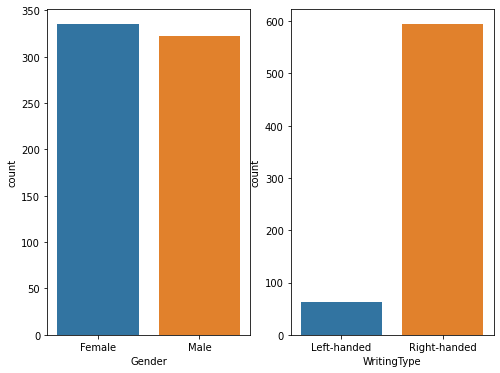

In [33]:
fig, ax =plt.subplots(1,2,figsize=(8,6))
sns.countplot(writers['Gender'], ax=ax[0])
sns.countplot(writers['WritingType'], ax=ax[1])
#sns.countplot(writers['GenderWritingType'], ax=ax[2])
fig.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

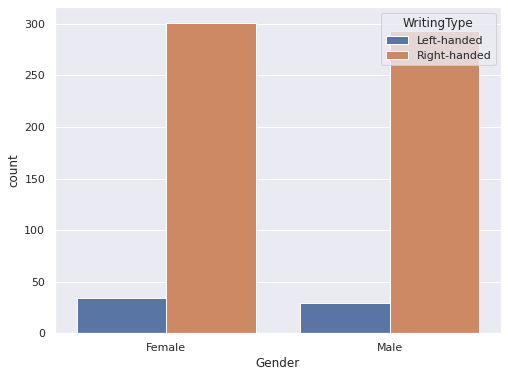

In [37]:
sns.set(rc={"figure.figsize":(8, 6)}) 
sns.countplot(data=writers, x='Gender', hue='WritingType')

<AxesSubplot:xlabel='NativeLanguage', ylabel='count'>

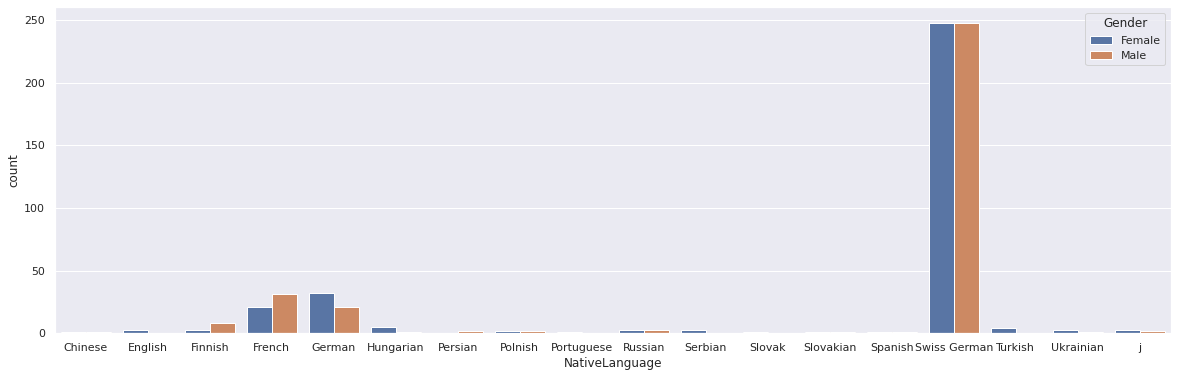

In [41]:
sns.set(rc={"figure.figsize":(20, 6)}) 
sns.countplot(data=writers, x='NativeLanguage', hue='Gender')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EducationalDegree1', ylabel='count'>

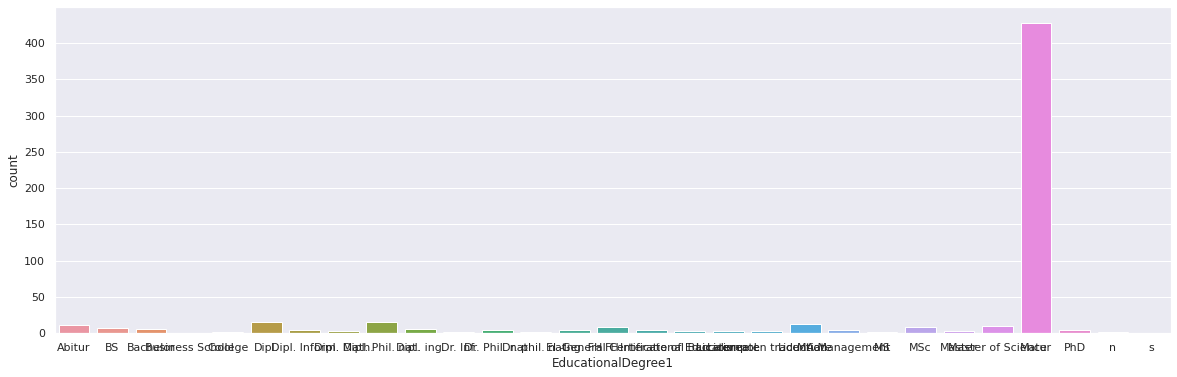

In [42]:
sns.countplot(writers['EducationalDegree1'])

#Lines Dataset

In [50]:
def label(df: pd.DataFrame)-> pd.DataFrame:
  df['gender'] = df['gender'].astype('category')
  df['writing'] = df['writing'].astype('category')
  df['gender'] = df['gender'].cat.rename_categories({0:'Male',1:'Female'})
  df['writing'] = df['writing'].cat.rename_categories({0:'Right-handed Male',1:'Left-handed Male',2:'Right-handed Female',3:'Left-handed Female'})
  return df

In [52]:
lines_class = label(lines_class)

In [53]:
lines_class

,Unnamed: 0,image,writing,gender
0,0,/content/drive/MyDrive/lines folder/p02-022-07...,Right-handed Female,Female
1,1,/content/drive/MyDrive/lines folder/p02-022-03...,Right-handed Female,Female
2,2,/content/drive/MyDrive/lines folder/p02-027-01...,Right-handed Male,Male
3,3,/content/drive/MyDrive/lines folder/p02-027-02...,Right-handed Male,Male
4,4,/content/drive/MyDrive/lines folder/p02-027-03...,Right-handed Male,Male
...,...,...,...,...
13348,13348,/content/drive/MyDrive/lines folder/a01-058x-0...,Left-handed Female,Female
13349,13349,/content/drive/MyDrive/lines folder/a01-058x-0...,Left-handed Female,Female
13350,13350,/content/drive/MyDrive/lines folder/a01-058x-0...,Left-handed Female,Female
13351,13351,/content/drive/MyDrive/lines folder/a01-058x-0...,Left-handed Female,Female


<AxesSubplot:xlabel='writing', ylabel='count'>

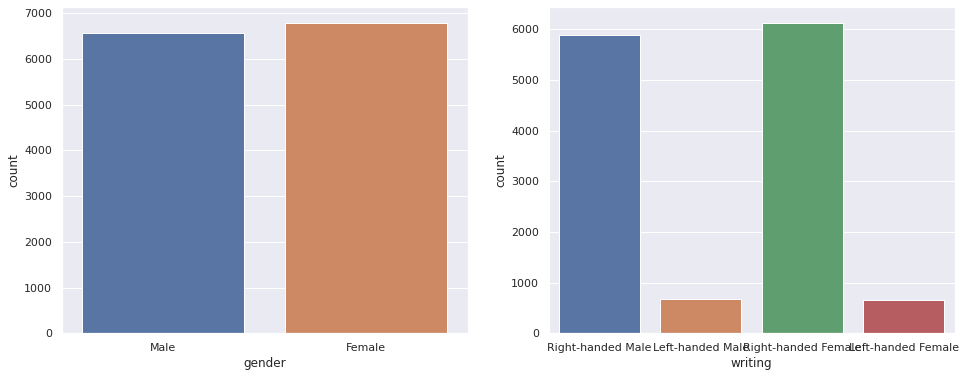

In [55]:
fig, ax =plt.subplots(1,2,figsize=(16,6))
sns.countplot(lines_class['gender'], ax=ax[0])
sns.countplot(lines_class['writing'], ax=ax[1])

In [56]:
lines['Writer'] = lines['Writer'].astype('category')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Writer', ylabel='count'>

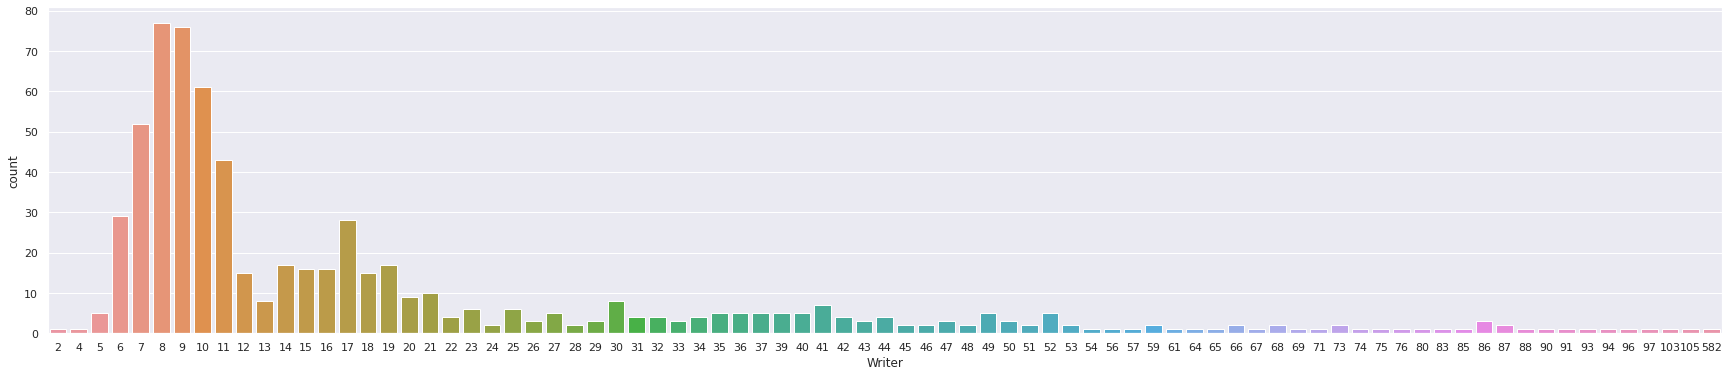

In [74]:
sns.set(rc={"figure.figsize":(30, 6)}) 
sns.countplot(lines['Writer'].value_counts())

#Paragraph

In [59]:
paragraph_class = label(paragraph_class)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing', ylabel='count'>

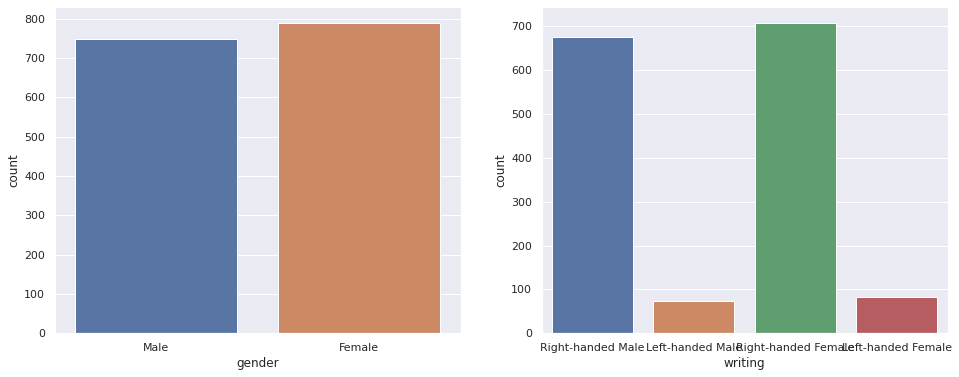

In [60]:
fig, ax =plt.subplots(1,2,figsize=(16,6))
sns.countplot(paragraph_class['gender'], ax=ax[0])
sns.countplot(paragraph_class['writing'], ax=ax[1])

In [75]:
paragraph['Writer'] = paragraph['Writer'].astype('category')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Writer', ylabel='count'>

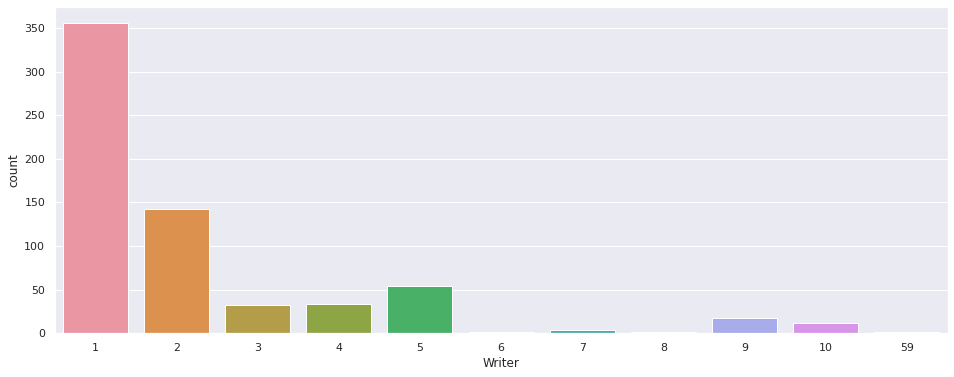

In [77]:
sns.set(rc={"figure.figsize":(16, 6)}) 
sns.countplot(paragraph['Writer'].value_counts())